In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt
import analysis_utils as au
import importlib

In [3]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [1, 5, 6, 13, 18, 25]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])

    tt = np.transpose(data['C'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])

Text(0, 0.5, 'PSD (V$^2$/Hz)')

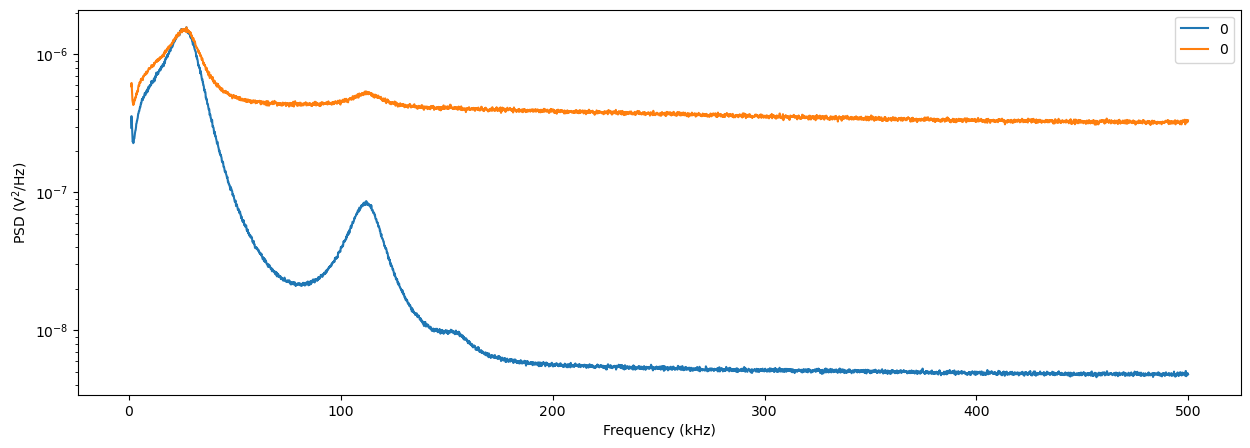

In [19]:
plt.figure(figsize = (15, 5))
lb = int(1000*nps_frac)
ub = int(500000*nps_frac)
for n, PSD in enumerate(PSDs[-1:]):
    plt.plot(PSDx[0][lb:ub]/1000, PSD[lb:ub], label = str(n))
    #plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
for n, PSD in enumerate(PSDs2[-1:]):
    plt.plot(PSDx[0][lb:ub]/1000, PSD[lb:ub]*1700, label = str(n))
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

# plt.figure(figsize = (15, 5))
# plt.tick_params(axis='both', which='both', labelsize=18)
# lb = int(100000*nps_frac)
# ub = int(300000*nps_frac)
# for n, PSD in enumerate(PSDs2):
#     plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
#     #plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
# plt.yscale('log')
# plt.legend(fontsize = 18)
# plt.xlabel('Frequency (kHz)', fontsize = 18)
# plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

In [2]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [1, 5, 6, 13, 18, 25]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    if file == 13:
        fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 50000, 10000, 2*10**(10), 132000, 10000, 5.0*10**(-9)])
        fitted = au.triple_Linewidth2(PSD[0], *fit)
    elif file == 25:
        lb = int(10000*nps_frac)
        ub = int(300000*nps_frac)
        fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 120000, 10000, 2*10**(10), 150000, 10000, 7.0*10**(-9)])
        fitted = au.triple_Linewidth2(PSD[0], *fit)
    else:
        fit, cov = opt.curve_fit(au.double_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000, 10**11, 170000, 10000, 5*10**(-9)])
        fitted = au.double_Linewidth2(PSD[0], *fit)
        fit = np.concatenate((fit, np.zeros(3)))
    fit_l.append(fit)
    fitted_l.append(fitted)

    tt = np.transpose(data['A'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    if file == 13:
        lb = int(125000*nps_frac)
        ub = int(200000*nps_frac)
        fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [3*10**8, 132000, 20000, 3*10**(-10)])
        fitted = au.Linewidth2(PSDx[0], *fit)
    elif file == 25:
        lb = int(100000*nps_frac)
        ub = int(200000*nps_frac)
        fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [3*10**8, 152000, 20000, 3*10**(-10)])
        fitted = au.Linewidth2(PSDx[0], *fit)
    else:
        lb = int(200000*nps_frac)
        ub = int(300000*nps_frac)
        fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [10*10**8, 220000, 20000, 3*10**(-10)])
        fitted = au.Linewidth2(PSDx[0], *fit)
    fit_l2.append(fit)
    fitted_l2.append(fitted)
PSD_freq = PSD[0]

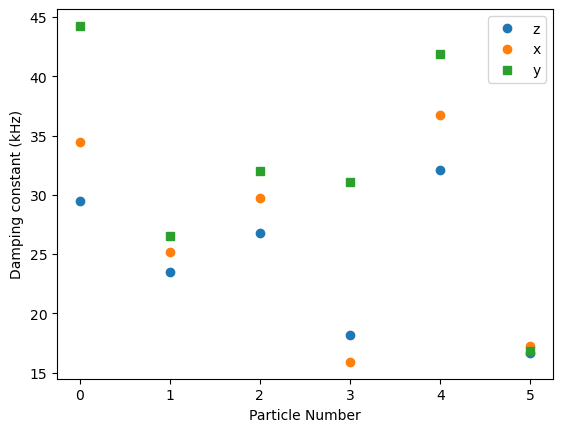

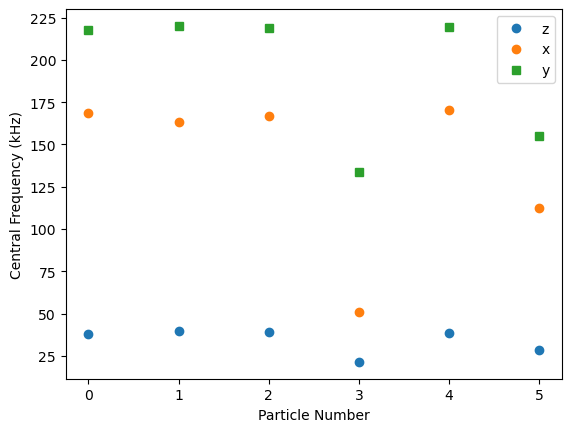

In [3]:
plt.plot(np.transpose(fit_l)[2]/1000, 'o', label = 'z')
plt.plot(abs(np.transpose(fit_l)[5])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[8][3], abs(np.transpose(fit_l)[8][5])])/1000, 'o', label = 'y - fit 1')
plt.plot(abs(np.transpose(fit_l2)[2])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Particle Number')
plt.legend()
plt.figure()
plt.plot(np.transpose(fit_l)[1]/1000, 'o', label = 'z')
plt.plot(abs(np.transpose(fit_l)[4])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]])/1000, 'o', label = 'y - fit 1')
plt.plot(np.transpose(fit_l2)[1]/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Particle Number')
plt.legend()

Text(0, 0.5, 'PSD (V$^2$/Hz)')

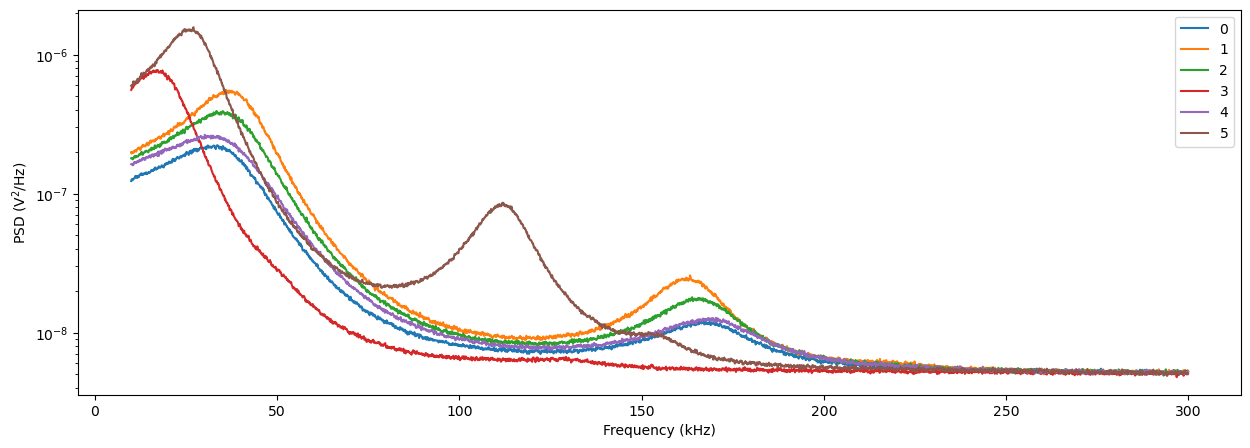

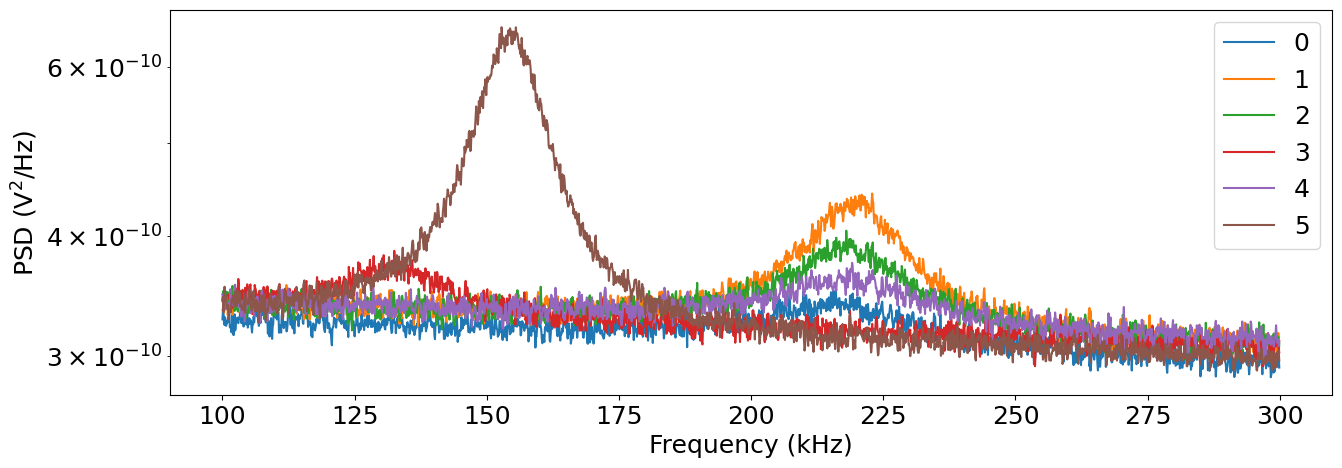

In [4]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
    #plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure(figsize = (15, 5))
plt.tick_params(axis='both', which='both', labelsize=18)
lb = int(100000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs2):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
    #plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

In [22]:
filename = 'D:/Lab Data/diamond/240520/'
file = 1
data = sio.loadmat(filename + str(file) + '.mat')
x = np.transpose(data['A'])[0]
fs = int(1/data['Tinterval'][0][0])
nps_frac = 0.01
PSDx = scisig.welch(x, fs = fs, nperseg = int(nps_frac*fs))

lb = int(200000*nps_frac)
ub = int(300000*nps_frac)
fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [3*10**8, 220000, 20000, 3*10**(-10)])
fitted = au.Linewidth2(PSDx[0], *fit)
print(fit)
print(np.sqrt(cov[2][2]))


[3.95021472e+09 2.17428035e+05 4.42483277e+04 2.95933885e-10]
1281.9047060864182


Text(0, 0.5, 'PSD (V$^2$/Hz)')

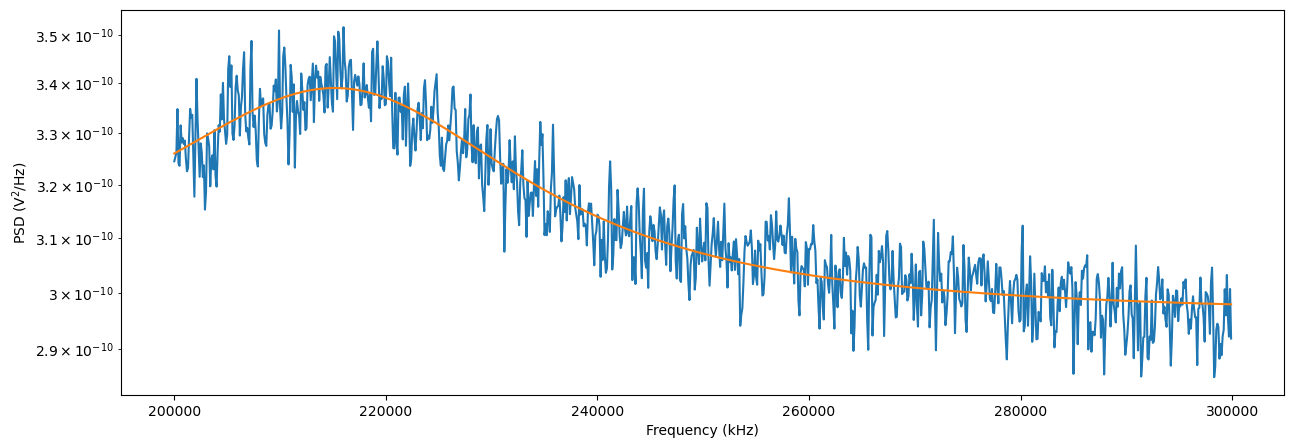

In [23]:
plt.figure(figsize = (15, 5))
lb = int(200000*nps_frac)
ub = int(300000*nps_frac)
plt.plot(PSDx[0][lb:ub], PSDx[1][lb:ub])
plt.plot(PSDx[0][lb:ub], fitted[lb:ub])
plt.yscale('log')
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

In [24]:
PSDs3 = []
fit_l3 = []
fitted_l3 = []
for i in range(1,4):
    filename = 'D:/Lab Data/diamond/240521/Mass/Particle '+str(i)+'/'
    data = sio.loadmat(filename + 'NoChargeNoDrive.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs3.append(PSD[1])
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    fit, cov = opt.curve_fit(au.double_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000, 10**11, 140000, 10000, 12*10**(-9)])
    fitted = au.double_Linewidth2(PSD[0], *fit)
    fit_l3.append(fit)
    fitted_l3.append(fitted)
PSD_freq3 = PSD[0]

In [25]:
# There's a tonne of stuff aliased in to the data here because I don't have the low pass anti-aliasing filters on the data input so this could skew things

Text(0.5, 0, 'Particle Number')

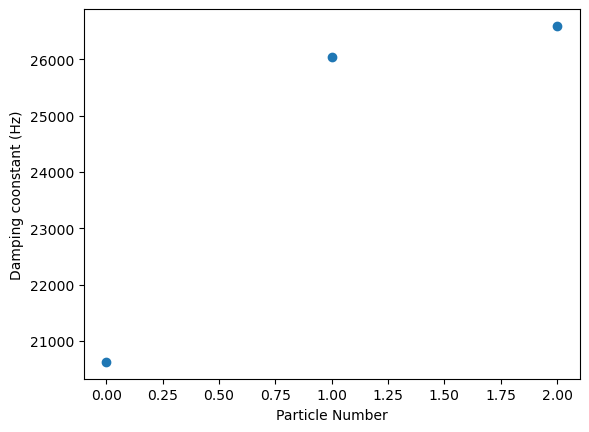

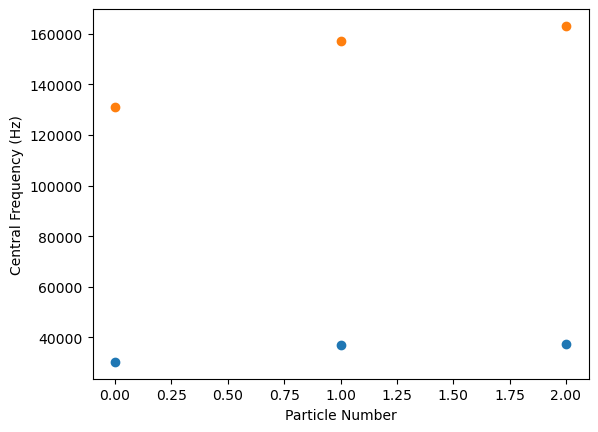

In [26]:
plt.plot(np.transpose(fit_l3)[2], 'o')
#plt.plot(abs(np.transpose(fit_l3)[5]), 'o')
plt.ylabel('Damping coonstant (Hz)')
plt.xlabel('Particle Number')
plt.figure()
plt.plot(np.transpose(fit_l3)[1], 'o')
plt.plot(abs(np.transpose(fit_l3)[4]), 'o')
plt.ylabel('Central Frequency (Hz)')
plt.xlabel('Particle Number')

Text(0, 0.5, 'PSD (V$^2$/Hz)')

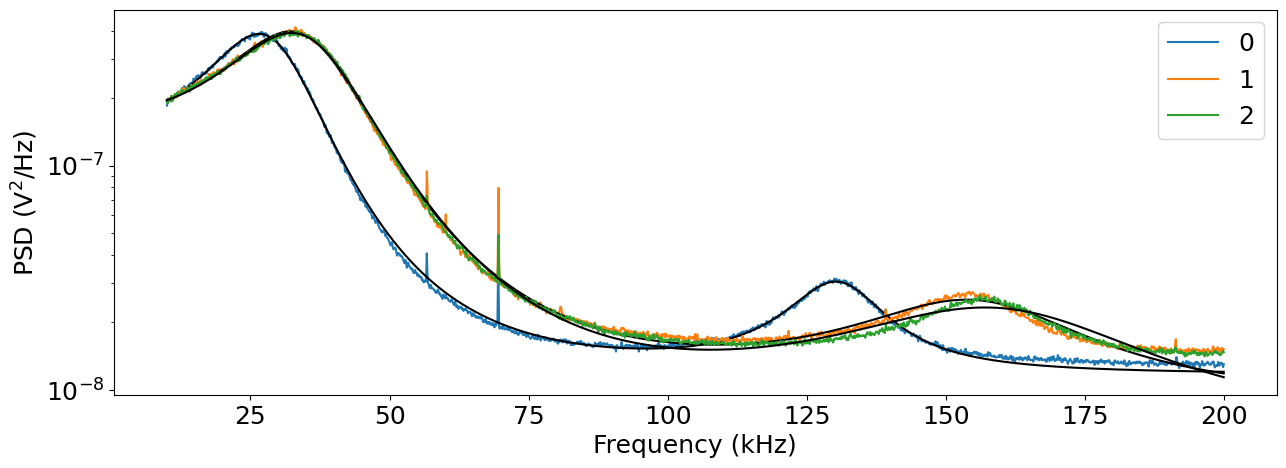

In [30]:
plt.figure(figsize = (15, 5))
plt.tick_params(axis='both', which='both', labelsize=18)
lb = int(10000*nps_frac)
ub = int(200000*nps_frac)
for n, PSD in enumerate(PSDs3):
    plt.plot(PSD_freq3[lb:ub]/1000, PSD[lb:ub], label = str(n))
    plt.plot(PSD_freq3[lb:ub]/1000, fitted_l3[n][lb:ub], 'k')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

Text(0, 0.5, 'PSD (V$^2$/Hz)')

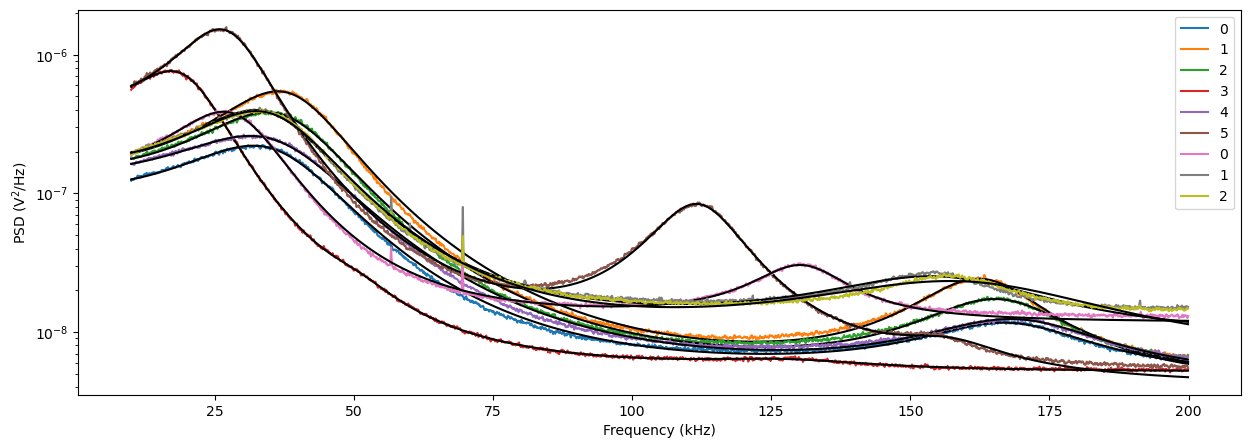

In [29]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(200000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq3[lb:ub]/1000, PSD[lb:ub], label = str(n))
    plt.plot(PSD_freq3[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
for n, PSD in enumerate(PSDs3):
    plt.plot(PSD_freq3[lb:ub]/1000, PSD[lb:ub], label = str(n))
    plt.plot(PSD_freq3[lb:ub]/1000, fitted_l3[n][lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

In [15]:
eps = 1.45**2
rho = 2200
aSi = (np.sqrt((eps-1)/(eps+2)/rho))
eps = 30
rho = 800
aMe = (np.sqrt((eps-1)/(eps+2)/rho))
eps = 5.7
rho = 3500
aDi = (np.sqrt((eps-1)/(eps+2)/rho))

In [16]:
print(np.transpose(fit_l)[1])
print(np.transpose(fit_l)[4])
print(np.transpose(fit_l2)[1])

[38111.04672587 39937.2495359  39291.77755235 21380.05901311
 38693.61774611 28449.19217895]
[168699.61251909 163314.318895   166608.16442208  51060.999893
 170248.13585913 112235.63634849]
[217428.03116523 220111.33919785 219097.19728655 133468.08830829
 219481.82120462 154937.5677889 ]


In [17]:
print(np.transpose(fit_l)[1][5]*aMe/aSi)
print(np.transpose(fit_l)[1][5]*aDi/aSi)

print(np.transpose(fit_l)[4][5]*aMe/aSi)
print(np.transpose(fit_l)[4][5]*aDi/aSi)

print(np.transpose(fit_l2)[1][5]*aMe/aSi)
print(np.transpose(fit_l2)[1][5]*aDi/aSi)

86635.38137223481
33992.71236516138
341787.4608686369
134105.51974611485
471826.23639520584
185128.21535589144


In [40]:
filename = 'D:/Lab Data/diamond/240520/'
files = [8, 9, 10, 11, 12, 13, 14, 15, 16]
PSDs = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

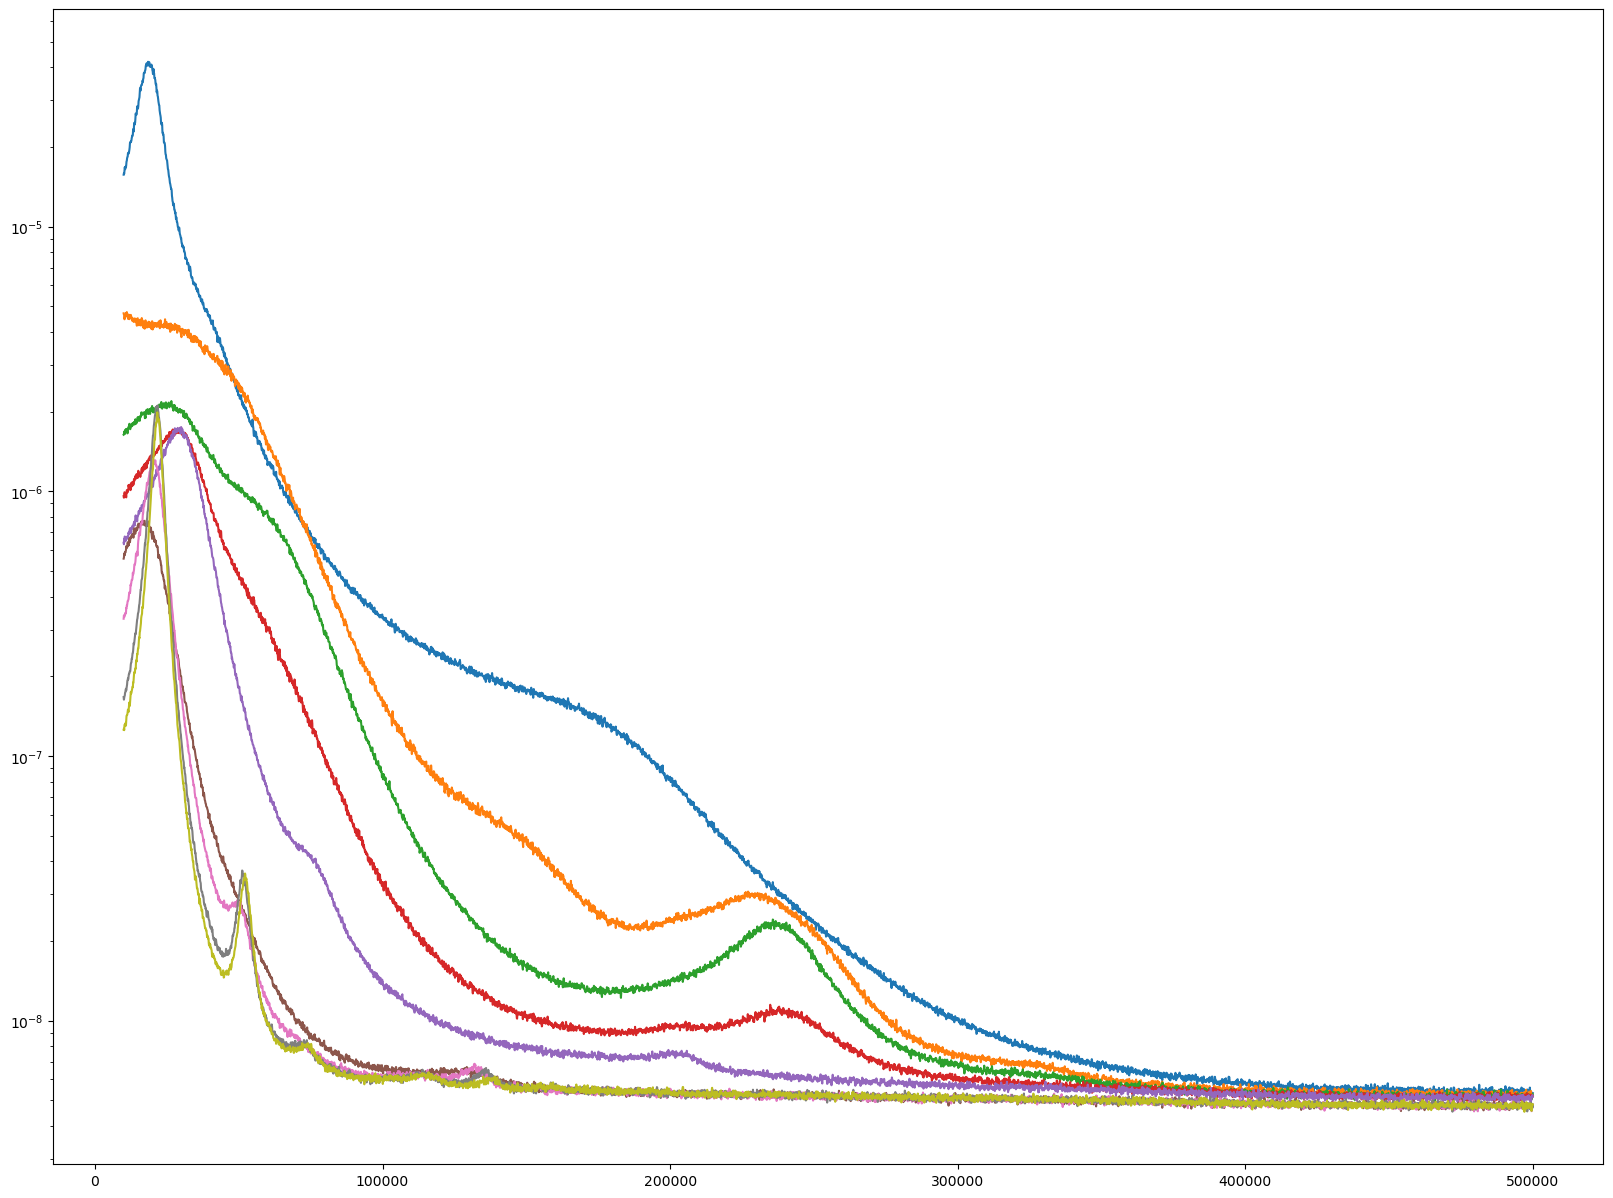

In [42]:
plt.figure(figsize = (20, 15))
lb = int(10000*nps_frac)
ub = int(500000*nps_frac)
for PSD in PSDs:
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [32]:
filename = 'D:/Lab Data/diamond/240520/'
files = [1, 2, 3]
PSDs = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

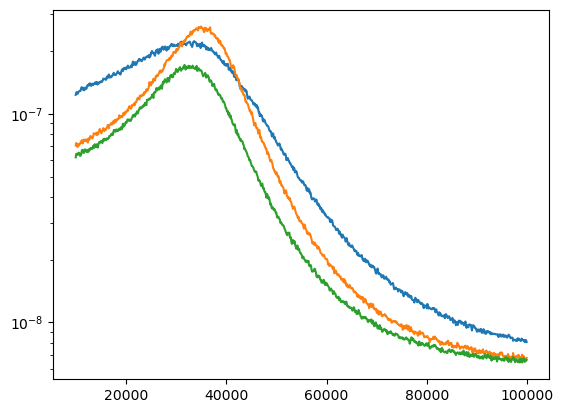

In [33]:
plt.figure()
lb = int(10000*nps_frac)
ub = int(100000*nps_frac)
for PSD in PSDs:
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [24]:
filename = 'D:/Lab Data/diamond/240520/'
files = [4, 5]
PSDs = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 1
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

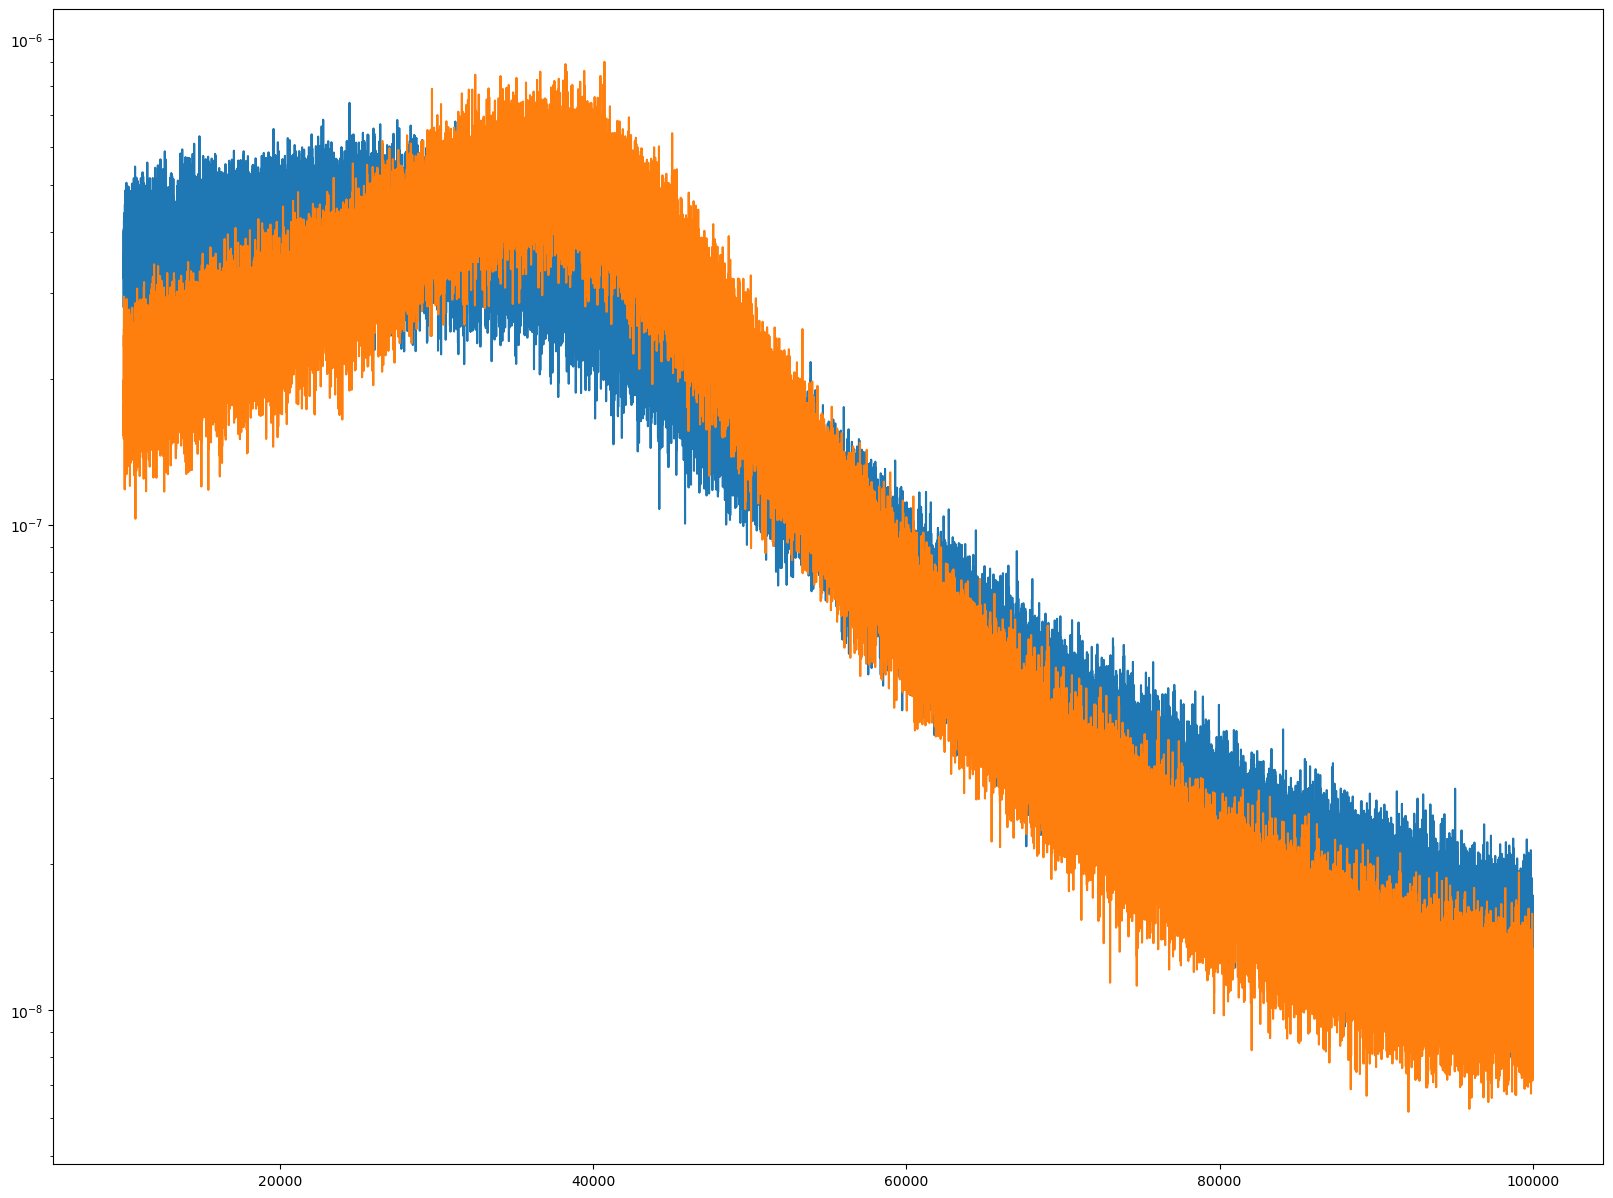

In [25]:
plt.figure(figsize = (20, 15))
lb = 10000
ub = 100000
for PSD in PSDs:
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [26]:
filename = 'D:/Lab Data/diamond/240520/'
files = [6, 7]
PSDs = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 1
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

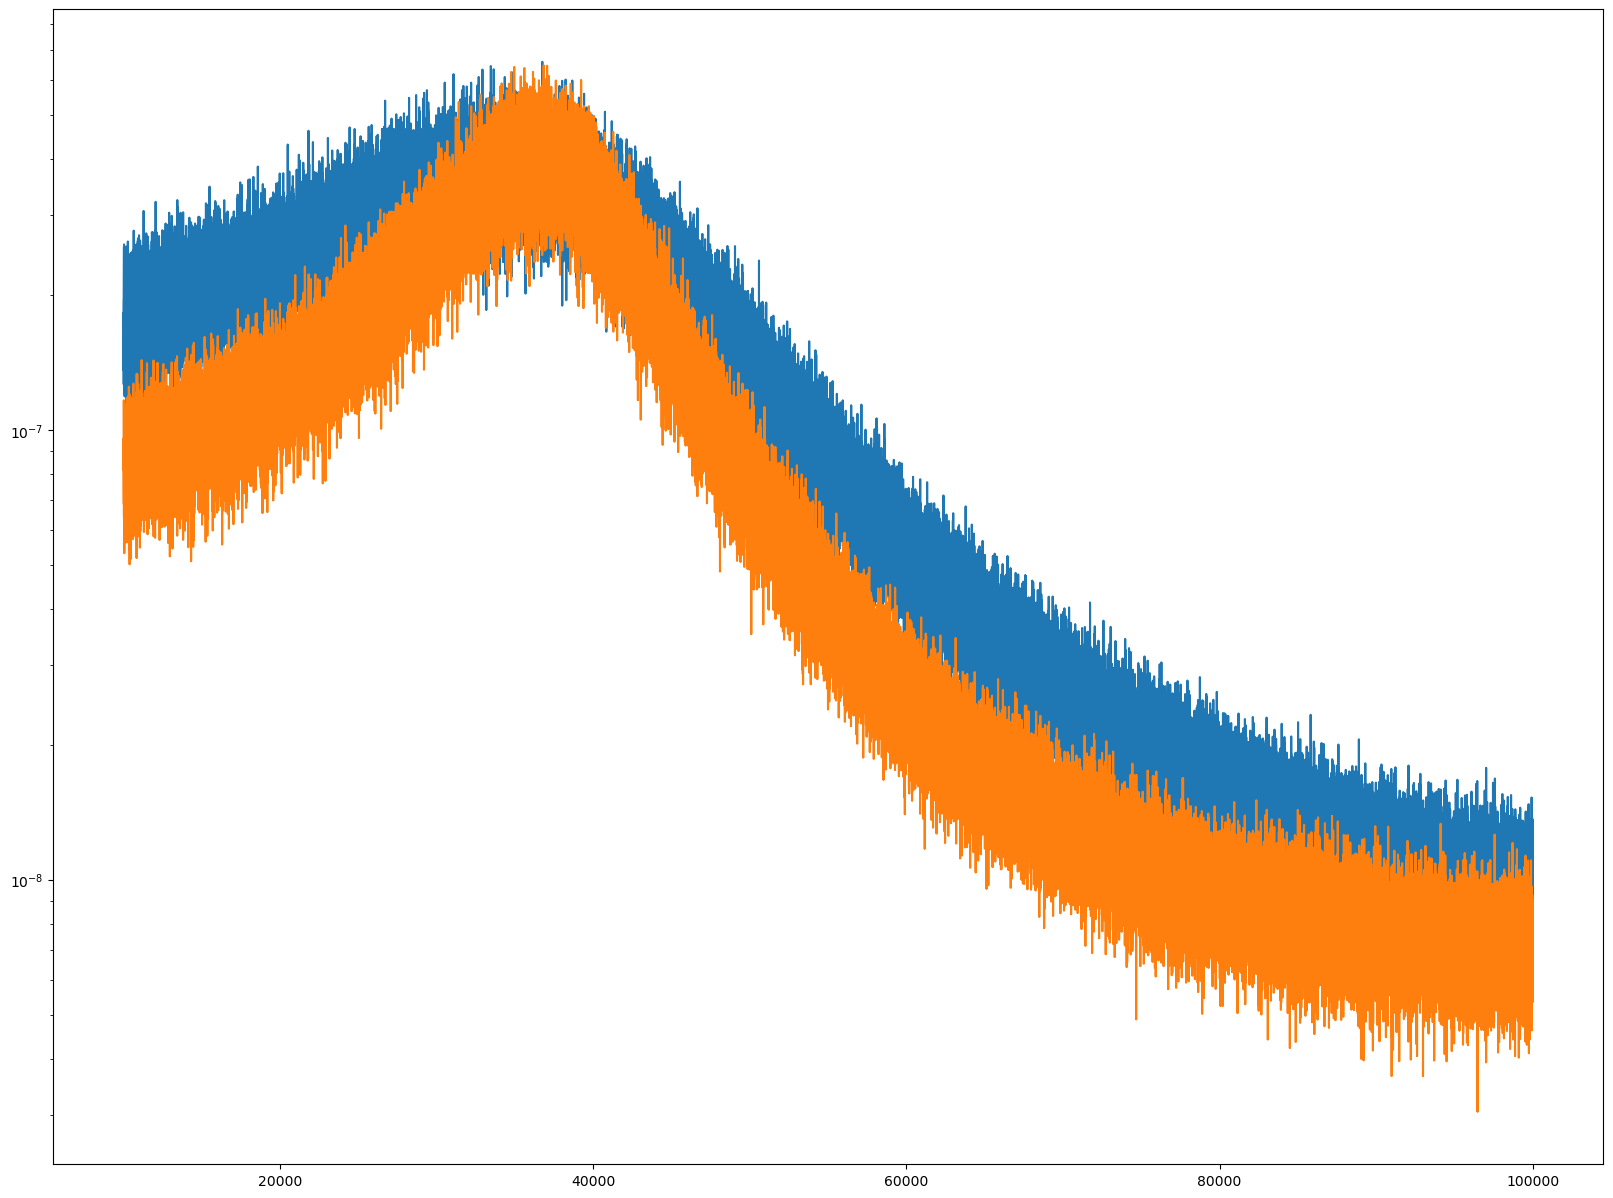

In [27]:
plt.figure(figsize = (20, 15))
lb = 10000
ub = 100000
for PSD in PSDs:
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [28]:
filename = 'D:/Lab Data/diamond/240520/'
files = [17, 18]
PSDs = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 1
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

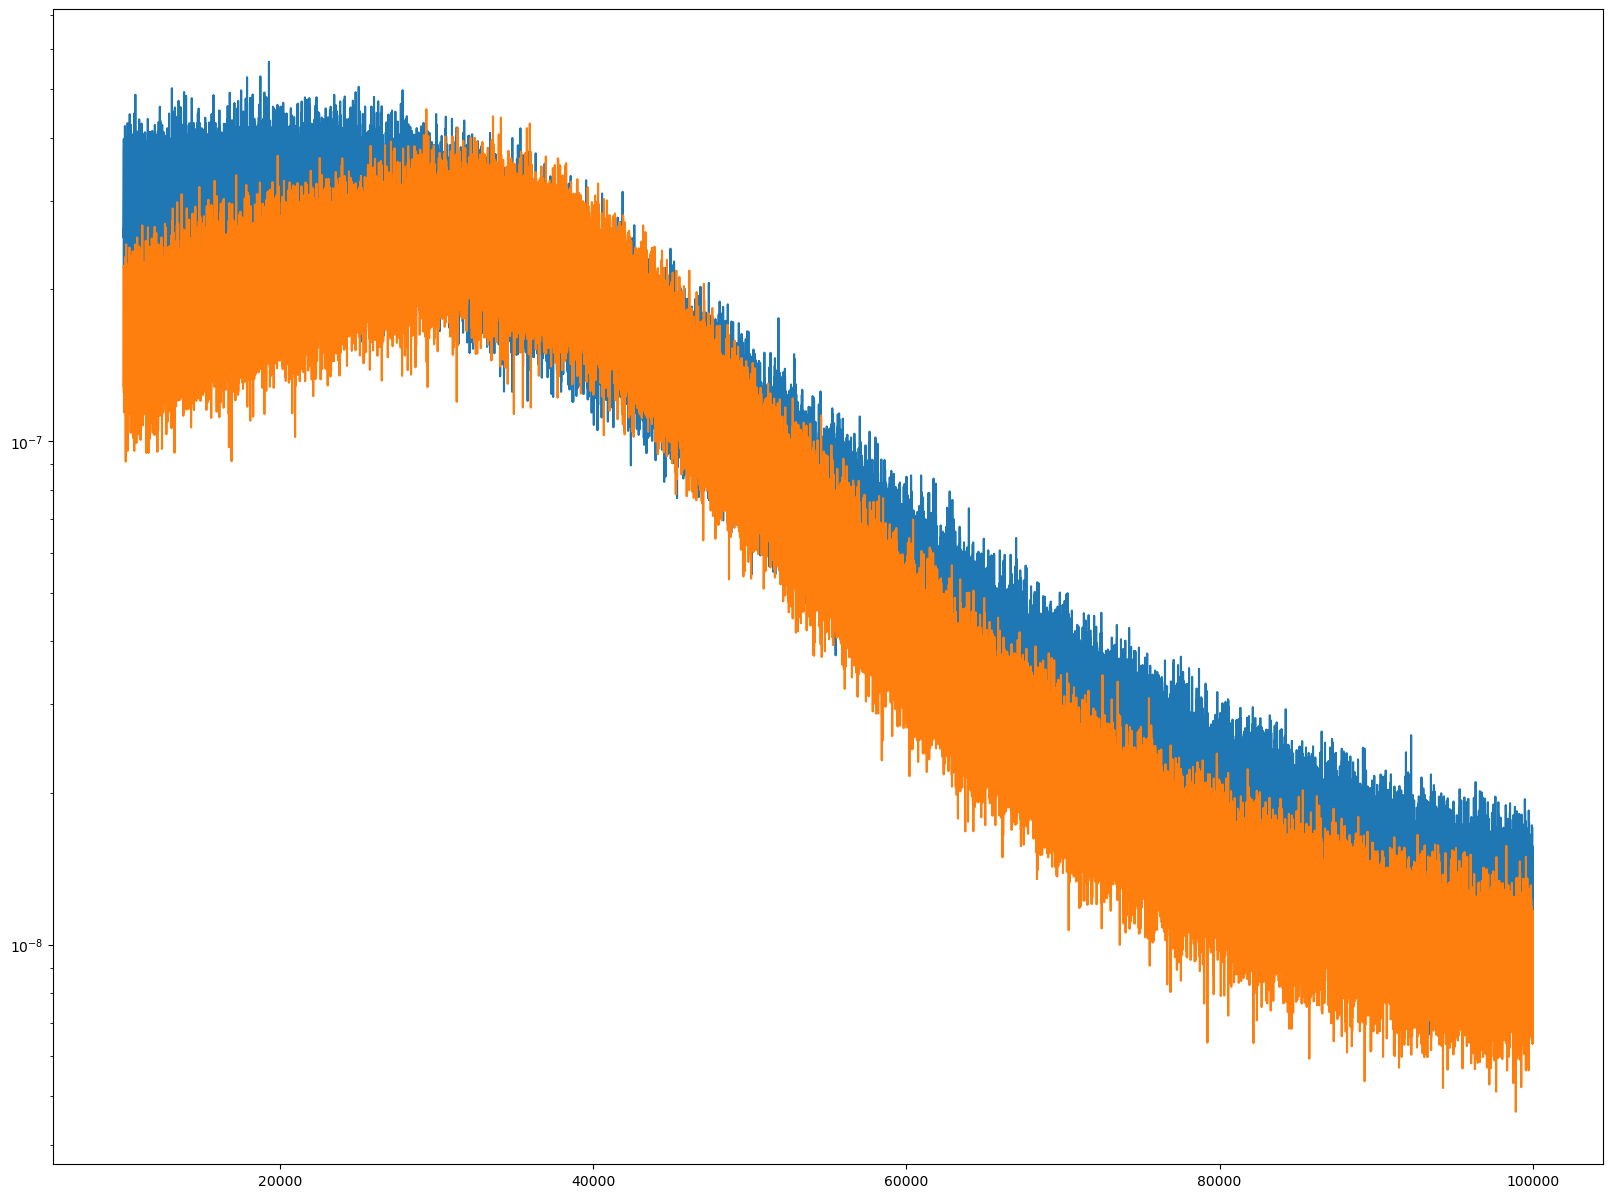

In [29]:
plt.figure(figsize = (20, 15))
lb = 10000
ub = 100000
for PSD in PSDs:
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
plt.yscale('log')